Accuracy: 0.5317577548005908
[[110  15  41   4]
 [ 40  58  21  37]
 [ 61  25  74  28]
 [ 10   9  26 118]]


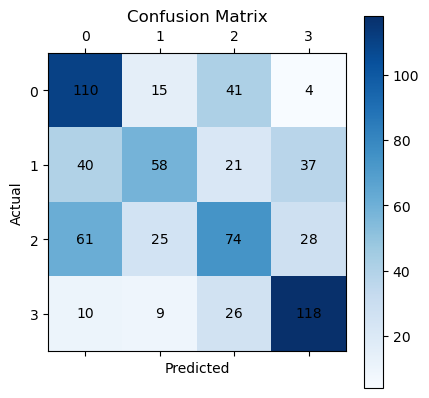

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the directory containing your files
directory = '/Users/jnaysha/Desktop/Naysha\'s work/Courses/Physics/Music Machine Learning/Results'

label_mapping = {
    "rock_results.txt": 0,
    "metal_results.txt": 1,
    "punk_results.txt": 2,
    "Ourpunk_results.txt": 3
}

# directory = '/Users/jnaysha/Desktop/Naysha\'s work/Courses/Physics/Music Machine Learning/Results_smallFMA'

# label_mapping = {
#     "results_electronic.txt": 0,
#     "results_experimental.txt": 1,
#     "results_folk.txt": 2,
#     "results_hiphop.txt": 3,
#     "results_instrumental.txt": 4,
#     "results_international.txt": 5,
#     "results_pop.txt": 6,
#     "results_rock.txt": 7,
#     "results_punk.txt": 8
# }

# Reading all the data from the files into separate dataframes
dataframes = []
for filename in os.listdir(directory):
    if filename.endswith(".txt"):
        file_path = os.path.join(directory, filename)
        df = pd.read_csv(file_path, sep='\t')
        dataframes.append(df)

# Find the size of the smallest dataset
min_size = min(len(df) for df in dataframes)

# Sample each dataframe to match the size of the smallest dataset
sampled_dataframes = [df.sample(n=min_size, random_state=42) if len(df) > min_size else df for df in dataframes]

# Concatenate the sampled dataframes into a single dataframe
df = pd.concat(sampled_dataframes, ignore_index=True)

# Splitting the data into features (x) and target variable (y)
X = df.drop(columns=['label'])
y = df['label']

#Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Scaling (optional)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize SVM classifier
svm = SVC()

# Train the SVM model
svm.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svm.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
print(cm)
# need to put numbers in each cell represent the number of samples that belong to the true class (rows) and predicted class (columns)
# Plotting the confusion matrix with annotations
plt.matshow(cm, cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Adding annotations
for (i, j), value in np.ndenumerate(cm):
    plt.text(j, i, f'{value}', ha='center', va='center', color='black')

plt.show()


